# Edge-based Image Segmentation

This method works well when object boundaries are clearly defined by intensity changes, making it ideal for tasks like object detection and boundary delineation in images.

## Canny Edge Detector

- Canny and Sobel are filters used for edge detection
- Multi-stage algorithm with Gaussian smoothing, gradient calculation, non-maximum suppression, and hysteresis thresholding.

The Canny algorithm aims to satisfy three main criteria:

- Low error rate: Meaning a good detection of only existent edges.
- Good localization: The distance between edge pixels detected and real edge pixels have to be minimized.
- Minimal response: Only one detector response per edge.

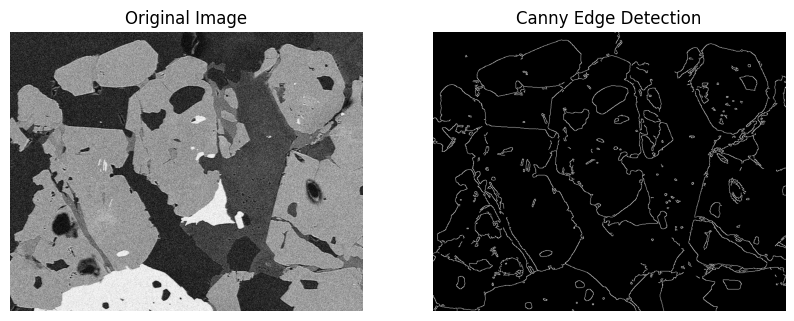

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('BSE_noisy.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5,5), 0)

# Use Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

# Display the original image and the edge-detected image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

### `cv2.Canny` Parameters:
- `threshold1`: The first threshold for the hysteresis procedure. This is the lower threshold, which marks the minimum intensity gradient for a pixel to be considered an edge.
- `threshold2`: The second threshold is the upper boundary for stronger edges. Pixels with intensity gradients above this value are automatically marked as edges.

## Combining Edge Detection with Contour Detection

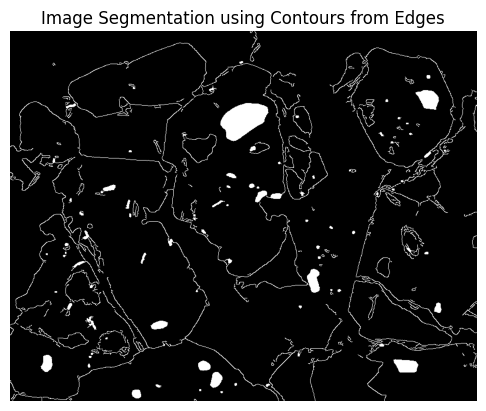

In [2]:
# Find contours from the detected edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to draw contours
segmented_img = np.zeros_like(img)

# Draw the contours on the empty image
cv2.drawContours(segmented_img, contours, -1, (255), thickness=-1)

# Display the segmented image with contours
plt.imshow(segmented_img, cmap='gray')
plt.title('Image Segmentation using Contours from Edges')
plt.axis('off')
plt.show()

### Explanation of Parameters

#### 1. `cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)`
- **`edges`**: The binary image (output from Canny edge detection) used to find contours.
- **`cv2.RETR_EXTERNAL`**: Specifies the contour retrieval mode. `RETR_EXTERNAL` retrieves only the outermost contours, ignoring any nested contours.
- **`cv2.CHAIN_APPROX_SIMPLE`**: Specifies the contour approximation method. `CHAIN_APPROX_SIMPLE` compresses horizontal, vertical, and diagonal segments, leaving only their end points. This reduces the number of points stored, making it more efficient.

#### 2. `cv2.drawContours(segmented_img, contours, -1, (255), thickness=-1)`
- **`segmented_img`**: The blank image where the contours will be drawn.
- **`contours`**: The list of contours detected by `findContours`.
- **`-1`**: This parameter specifies to draw all the contours. If a specific contour index is provided, only that contour will be drawn.
- **`(255)`**: The color used to draw the contours. Since the image is grayscale, `255` represents white.
- **`thickness=-1`**: Fills the inside of the contours. If a positive value is given, the contours are drawn with a specific thickness.




Canny edge detection is typically categorized as semi-automatic segmentation.

### Semi-Automatic Segmentation
- User-Guided: The process requires some degree of parameter tuning (e.g., thresholds for edge detection) and may need further refinement by the user.
- Algorithm-Driven: Once the parameters are set, the algorithm automatically identifies the edges or boundaries based on intensity gradients. It does not rely on manual pixel-by-pixel segmentation but uses edge-detection algorithms to segment an image.

### How the Process Works Overall:
1. Edge detection isolates the boundaries of objects in the image.
2. Contours are detected from the edges, which represent the shapes or boundaries of objects.
3. These contours are then drawn on a blank image to create a segmented version of the image, where different objects or regions are clearly delineated based on their boundaries.

### Edge vs Contour

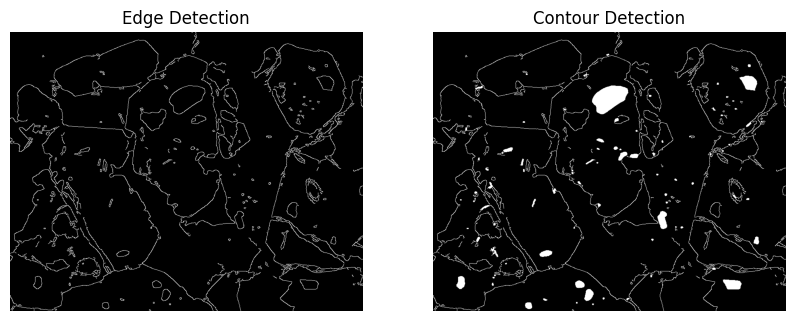

In [3]:
# Visualizing Edge Detection vs Contour Detection

plt.figure(figsize=(10, 5))

# Subplot for Edge Detection
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# Subplot for Contour Detection (use segmented_img)
plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Contour Detection')
plt.axis('off')

# Show the plots
plt.show()

A contour is simply the boundary of an object in the image. After detecting the edges (using Canny edge detection), the contours are detected based on these edges, and the cv2.drawContours() function fills these boundaries (contours) with white on a black background.

## Sobel Edge Detection

Computes gradients in horizontal and vertical directions to detect edges.

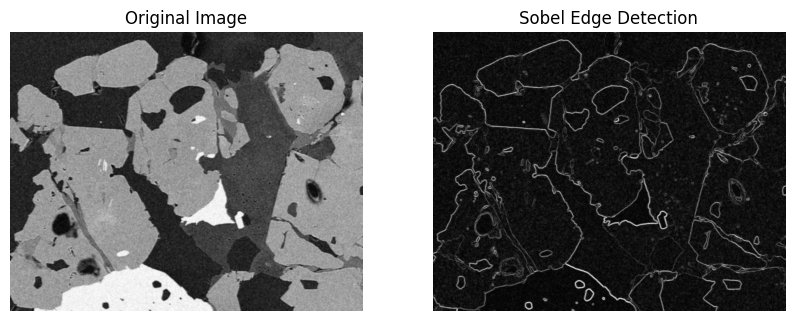

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('BSE_noisy.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Sobel filters to find gradients
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

# Compute gradient magnitude
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
magnitude = np.uint8(255 * magnitude / np.max(magnitude))  # Normalize to 0-255

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(blurred, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()


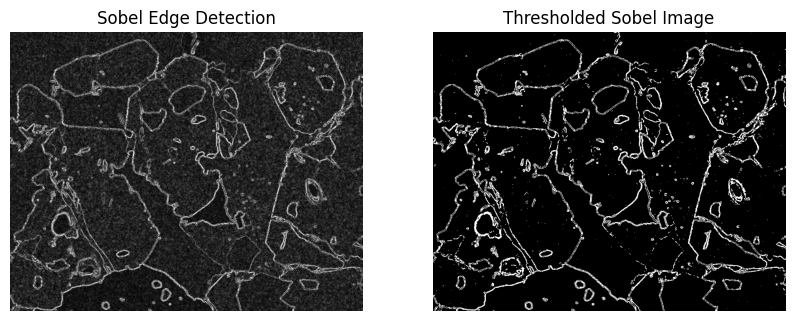

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("BSE_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Sobel Edge Detection
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

# Compute the gradient magnitude
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)

# Convert to uint8 for display
sobel_mag = np.uint8(sobel_mag)

# Apply a threshold to get binary edge image
_, sobel_thresh = cv2.threshold(sobel_mag, 100, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Display the Sobel and Thresholded Images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sobel_mag, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_thresh, cmap='gray')
plt.title('Thresholded Sobel Image')
plt.axis('off')

plt.show()


**Key Parameters**:
- `ksize`: Size of the kernel used for sobel filters (usually 3,5, or 7).
- `cv2.CV_64F`: Data type for intermediate gradient compuations to avoid overflow.
- Thresholding: Adjust threshold value to control edge detection sensitivity.

You can either experiment of threshold value manually or use histogram.

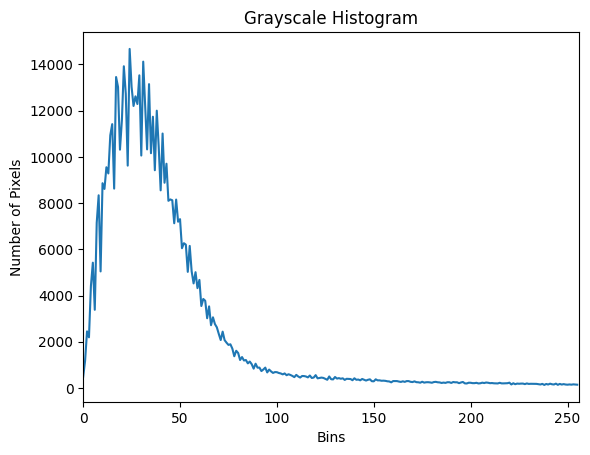

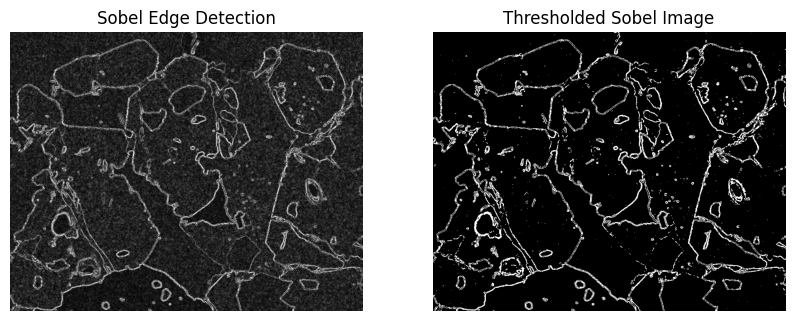

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("BSE_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Sobel Edge Detection
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

# Compute the gradient magnitude
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)

# Convert to uint8 for display
sobel_mag = np.uint8(sobel_mag)

# Calculate histogram
hist = cv2.calcHist([sobel_mag], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")
plt.plot(hist)
plt.xlim(0, 256)
plt.show()

# Apply a threshold to get binary edge image
_, sobel_thresh = cv2.threshold(sobel_mag, 100, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Display the Sobel and Thresholded Images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sobel_mag, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_thresh, cmap='gray')
plt.title('Thresholded Sobel Image')
plt.axis('off')

plt.show()

**NOTE**: `100`: This is the threshold value. Pixels in `sobel_mag` with values greater than `100` will be set to `255`, and those less than or equal to `100` will be set to `0`.

| Feature                | Edge Detection                               | Contour Detection                                 |
|------------------------|----------------------------------------------|--------------------------------------------------|
| **Definition**          | Detects areas in the image where there is a sudden change in intensity (gradients), often corresponding to object boundaries. | Finds and outlines the closed boundaries of objects by connecting detected edges into continuous shapes. |
| **Method**              | Uses gradient-based techniques (like Canny or Sobel) to find pixel intensity changes. | Extracts the outer boundaries of detected edges and creates continuous shapes. |
| **Output**              | A binary image showing the edges as thin lines. | A collection of contours, which are often displayed as white shapes on a black background or overlaid on the original image. |
| **Visual Appearance**   | Thin, white lines on a black background, representing abrupt changes in pixel intensity. | Closed shapes outlining the objects, which can be filled or drawn on top of the original image. |
| **Applications**        | Highlighting object boundaries, texture analysis, feature extraction. | Shape analysis, object recognition, segmentation, and finding object boundaries. |
| **Noise Sensitivity**   | Sensitive to noise in the image (especially with weak edges). | More robust in finding closed shapes but requires edges to be accurately detected first. |
| **Common Algorithms**   | Canny, Sobel, Prewitt, Roberts.              | cv2.findContours, convex hull, region-based segmentation. |
| **Color**               | Typically white edges on a black background. | Contours are usually displayed as white lines or filled shapes on a black or original image. |


### Role of Edge Detection in Segmentation

1. **Boundary Identification**:
   - **Edge Detection**: Detects significant changes in pixel intensity, highlighting object boundaries.
   - **Segmentation**: Uses these boundaries to separate the image into distinct regions.

2. **Segmentation Initialization**:
   - **Edge Detection**: Provides initial boundary information.
   - **Segmentation**: Refines regions based on the detected edges.

3. **Feature Extraction**:
   - **Edge Detection**: Extracts important features like contours and boundaries.
   - **Segmentation**: Utilizes these features for classifying regions.

4. **Enhanced Accuracy**:
   - **Edge Detection**: Improves segmentation accuracy by providing clear boundary definitions.
   - **Segmentation**: Achieves precise segmentation based on these boundaries.

### Practical Applications

- **Medical Imaging**: Outlines organs or tumors for further analysis.
- **Object Recognition**: Isolates and identifies objects within a scene.
- **Image Analysis**: Analyzes textures, shapes, and patterns.